# For Algorithm and Data Tests

In [2]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [3]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 150
np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
np.set_printoptions(threshold=np.inf)

Correlated signal generation

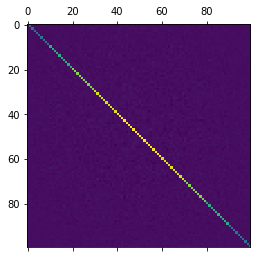

In [96]:
threshold = np.linspace(0.1, 0.9, 10)
signal = np.random.rand(100, 10000)
gap = int(100 / 10)
for i in range(10):
    signal[i*gap:(i+1)*gap][signal[i*gap:(i+1)*gap]<=threshold[i]] = 0
    signal[i*gap:(i+1)*gap][signal[i*gap:(i+1)*gap]>threshold[i]] = 1

plt.matshow(np.cov(signal))

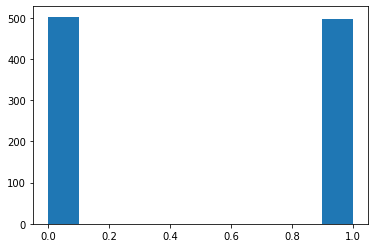

In [39]:
plt.hist(signal[:])
plt.show()

[[1 1 1 ... 0 0 1]
 [1 1 1 ... 1 0 1]
 [1 1 1 ... 0 1 0]
 ...
 [0 1 0 ... 1 1 1]
 [0 0 1 ... 1 1 0]
 [1 1 0 ... 1 0 1]]


C:\Users\Cbx\Anaconda3\envs\EE369\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


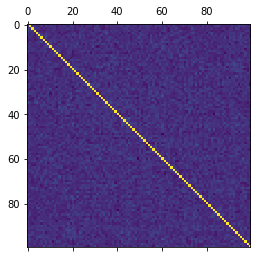

In [99]:

cov = np.random.randint(0, 2, (100, 100))
for i in range(100):
    cov[i, i] = 1
    for j in range(i, 100):
        cov[i, j] = cov[j, i]
print(cov)
A = np.random.multivariate_normal(np.zeros(100), cov, (100000))
A[A <= 0] = 0
A[A > 0] = 1
acov = np.corrcoef(A, rowvar=False)
plt.matshow(acov)

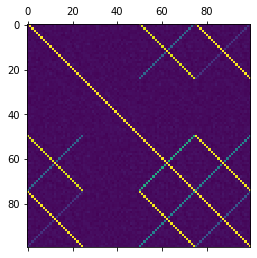

In [112]:
A = np.zeros((100, 10000))
A[0:50] = np.random.randint(0, 2, (50, 10000))
A[50:75] = (0.2*np.flipud(A[0:25]) + 0.6*A[0:25])
A[75:100] = A[0:25] + A[50:75]
plt.matshow(np.corrcoef(A))

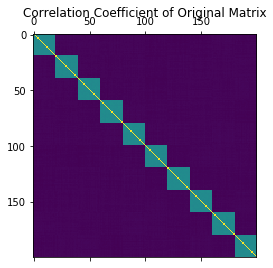

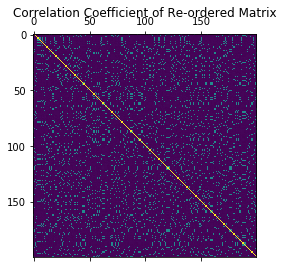

In [3]:
r = np.zeros((200, 100000))
user = 0.5
group = 0.1
for i in range(10):
    gg = np.random.rand(100000)
    p = np.random.rand(20, 100000)
    r[i*20:(i+1)*20][p < (1 - user)] = 0
    r[i*20:(i+1)*20][p >= (1 - user)] = 1
    r[i*20:(i+1)*20, gg < (1 - group)] = 0
ch = np.random.randn(100, 200)
# r = ch.T.dot(ch).dot(r)
idx = np.random.permutation(200)
r1 = r[idx]
cov = np.corrcoef(r)
plt.matshow(cov)
plt.title('Correlation Coefficient of Original Matrix')
plt.show()
cov1 = np.corrcoef(r1)
plt.matshow(cov1)
plt.title('Correlation Coefficient of Re-ordered Matrix')
plt.show()

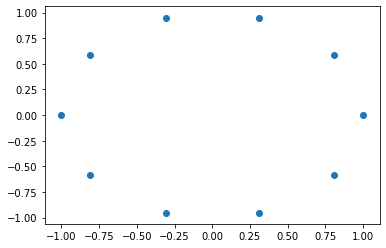

In [4]:
rand = np.random.rand(1000) * 2 * np.pi
b = np.pi * np.arange(10) / 5
a = np.exp(-1j * np.pi * np.arange(10) / 5)
# a = np.exp(-1j * np.pi * np.sin(rand))
real = np.real(a)
imag = np.imag(a)
plt.scatter(real, imag)
plt.show()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

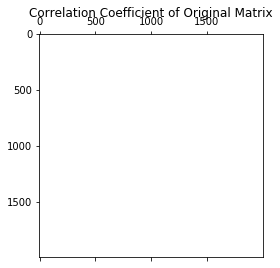

In [6]:
events = np.tile(np.arange(2000), (100, 1))
for i in range(100):
    events[i] = np.random.permutation(2000)
events = events[:, :15]

r = np.zeros((2000, 100000))
user = 0.9
group = 0.5
for i in tqdm_notebook(range(100)):
    gg = np.random.rand(100000)
    p = np.random.rand(15, 100000)
    r[events[i]][p < (1 - user)] = 0
    r[events[i]][p >= (1 - user)] = 1
    # r[events[i]][:, gg < (1 - group)] = 0

print(r[:, 0])
cov = np.corrcoef(r)
plt.matshow(cov)
plt.title('Correlation Coefficient of Original Matrix')
plt.show()